In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"],how="right")

# Display the data table for preview
#df=merge_df.drop_duplicates(subset='Mouse ID',keep='first')
merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.

len(merge_df['Mouse ID'].value_counts())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse = merge_df.loc[duplicated, 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all te data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] =='g989',:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df.dropna()
df = merge_df[merge_df['Mouse ID']!='g989']
#df=merge_df.drop_duplicates(subset=['Mouse ID'])

df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.

len(df['Mouse ID'].unique())

248

### Summary Statistic


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meantv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
meditv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
varitv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stantv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
ssemtv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summarytv = pd.DataFrame({'Mean Tumor Volume':meantv,
                          'Median Tumor Volume':meditv,
                          'Tumor Volume Variance':varitv,
                          'Tumor Volume Std. Dev.':stantv,
                          'Tumor Volume Std. Err.':ssemtv})
summarytv


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summarytv2 = (df.groupby('Drug Regimen')['Tumor Volume (mm3)']
                        .agg(['mean', 'median', 'var', 'std', 'sem']))
                   
                         
summarytv2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

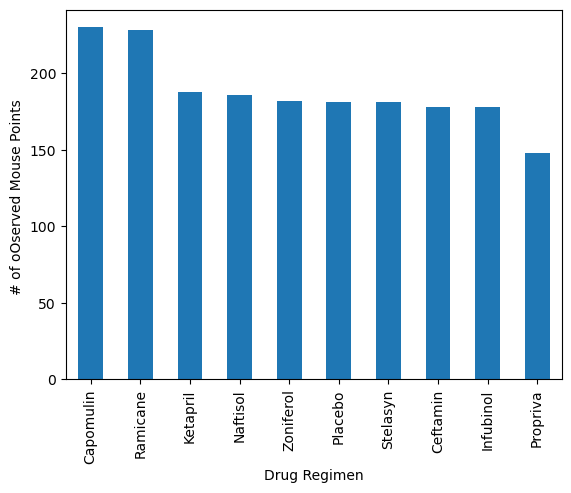

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

datos = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().sort_values(ascending=False)
datos.plot(kind="bar").set_ylabel("# of oOserved Mouse Points ")
plt.show()



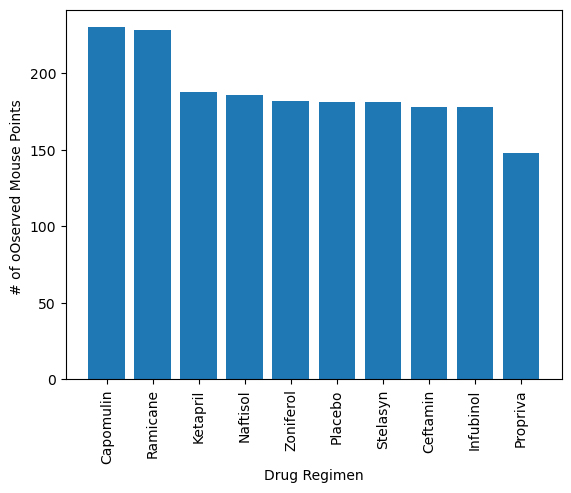

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


yaxis = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().sort_values(ascending=False)

xaxis=yaxis.index

plt.bar(xaxis,yaxis)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of oOserved Mouse Points ")
plt.show()

In [11]:
y_axis=df['Sex'].value_counts()
y_axis

Male      958
Female    922
Name: Sex, dtype: int64

In [12]:
x_axis=y_axis.index
x_axis

Index(['Male', 'Female'], dtype='object')

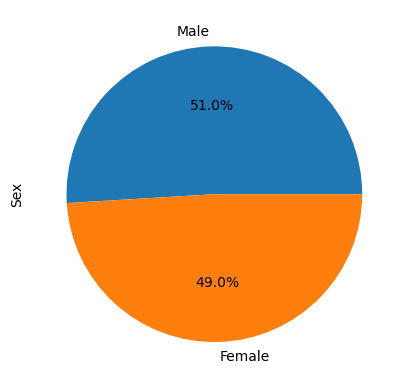

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = x_axis
values = y_axis
plt.ylabel('Sex')
plt.pie(values, labels=labels,  startangle=0,autopct="%1.1f%%")
plt.show()

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
new_df = df.rename(columns={'Drug Regimen': 'Drug'})
new_df

treatment = new_df.query("Drug==['Capomulin','Ramicane','Infubinol','Ceftamin']")
treatment






# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = treatment.groupby(['Drug','Mouse ID'])['Timepoint'].max()
timepoint_max.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorvol_max = treatment.groupby(['Drug','Mouse ID','Tumor Volume (mm3)'])['Timepoint'].max()
tumorvol_max

merge_df = pd.merge(timepoint_max , treatment, on=["Mouse ID",'Drug','Timepoint'],how="inner")
merge_df

,Mouse ID,Drug,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,45,Female,9,22,38.982878,2
1,b742,Capomulin,45,Male,7,21,38.939633,0
2,f966,Capomulin,20,Male,16,17,30.485985,0
3,g288,Capomulin,45,Male,3,19,37.074024,1
4,g316,Capomulin,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,Ramicane,45,Male,1,17,30.276232,0
96,u196,Ramicane,45,Male,18,25,40.667713,3
97,w678,Ramicane,5,Female,5,24,43.166373,0
98,y449,Ramicane,15,Male,19,24,44.183451,0


 This are the statistics for Capomulin,
    The lower quartile is: 32.37735684,
    The upper quartile is: 40.1592203,
    The interquartile range is : 7.781863460000004,
    The lower bound is : 20.70456164999999,
    The upper bound is: 51.83201549
    
 This are the statistics for Ramicane,
    The lower quartile is: 31.56046955,
    The upper quartile is: 40.65900627,
    The interquartile range is : 9.098536719999998,
    The lower bound is : 17.912664470000003,
    The upper bound is: 54.30681135
    
 This are the statistics for Infubinol,
    The lower quartile is: 54.04860769,
    The upper quartile is: 65.52574285,
    The interquartile range is : 11.477135160000003,
    The lower bound is : 36.83290494999999,
    The upper bound is: 82.74144559000001
    
 This are the statistics for Ceftamin,
    The lower quartile is: 48.72207785,
    The upper quartile is: 64.29983003,
    The interquartile range is : 15.577752179999997,
    The lower bound is : 25.355449580000002,
    Th

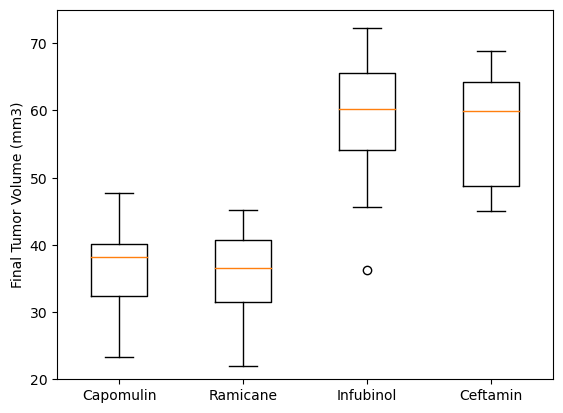

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capo = merge_df.query("Drug=='Capomulin'")
rami = merge_df.query("Drug=='Ramicane'")
infu = merge_df.query("Drug=='Infubinol'")
ceft = merge_df.query("Drug=='Ceftamin'")
medi=[capo,rami,infu,ceft]
x=0
for i in medi :
    labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
    x = x+1
    stadi = i['Tumor Volume (mm3)'].describe()
    q1 = stadi['25%']
    q3 = stadi['75%']
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    print(f''' This are the statistics for {labels[x-1]},
    The lower quartile is: {q1},
    The upper quartile is: {q3},
    The interquartile range is : {iqr},
    The lower bound is : {lower_bound},
    The upper bound is: {upper_bound}
    ''')
    


graf1 = capo['Tumor Volume (mm3)']
graf2 = rami['Tumor Volume (mm3)']
graf3 = infu['Tumor Volume (mm3)']
graf4 = ceft['Tumor Volume (mm3)']


greft = plt.boxplot([graf1, graf2,graf3,graf4], labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'] )

plt.ylabel("Final Tumor Volume (mm3)")

plt.ylim(20, 75)

plt.show()




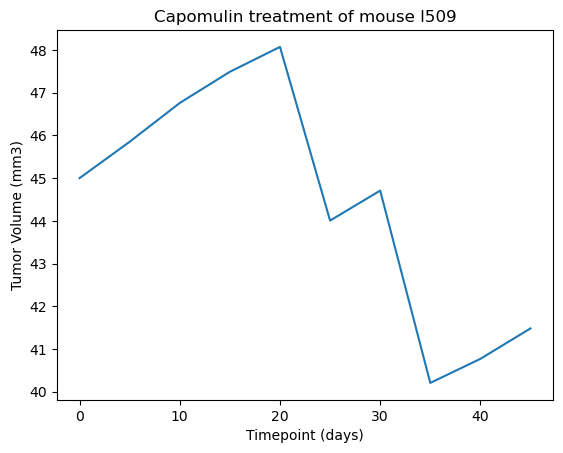

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
  
rename = new_df.rename(columns={'Mouse ID': 'Mouse'})
rename

l509 = rename.query("Mouse =='l509'")

l509.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend().remove()
plt.show()

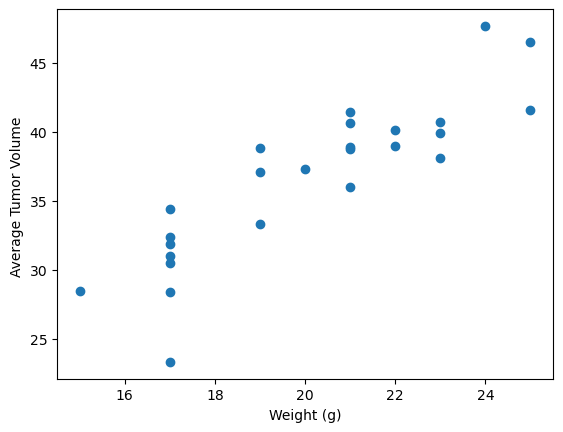

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scat = merge_df.query("Drug =='Capomulin'")

plt.scatter(scat.iloc[:,5],scat.iloc[:,6])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume ') 
plt.show()